# Question 1


In [1]:
import pandas as pd
import numpy as np
#Step 3

users = pd.read_csv(r'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/u.user', sep='|')
users.head()
print (users.describe)

# Step 4

mean_age = users.groupby('occupation')['age'].mean()
print ("Mean Age per Occupation is as below:")
print(mean_age)
print ()

#Step 5

total_count = users.groupby('occupation').gender.count()
users['male_count'] = np.where(users.gender == 'M', 1, 0)
male_ratio = (users.groupby('occupation').male_count.sum()/total_count).round(2).sort_values(ascending = False)
print ("Male Ratio per Occupation is as below:")
print (male_ratio)
print()

#Step 6

min_age = users.groupby('occupation')['age'].min()
print ("Min Age per Occupation is as below:")
#print (min_age)
print()

max_age = users.groupby('occupation')['age'].max()
print ("Max Age per Occupation is as below:")
print (max_age)
print()

#Step 7
mean_age_sex = pd.pivot_table(users,'age','occupation','gender')
print ("Mean Age per Sex per Occupation is as below:")
print (mean_age_sex)
print ()

#Step 8

total_count = users.groupby('occupation').gender.count()
users['male_count'] = np.where(users.gender == 'M', 1, 0)
users['female_count'] = np.where(users.gender == 'F', 1, 0)
male_percentage = ((users.groupby('occupation').male_count.sum()/total_count)*100).round(2)
female_percentage = ((users.groupby('occupation').female_count.sum()/total_count)*100).round(2)
print ("Male Percentage per Occupation is as below:")
print (male_percentage)
print ("Female Percentage per Occupation is as below:")
print (female_percentage)
print()



<bound method NDFrame.describe of      user_id  age gender     occupation zip_code
0          1   24      M     technician    85711
1          2   53      F          other    94043
2          3   23      M         writer    32067
3          4   24      M     technician    43537
4          5   33      F          other    15213
..       ...  ...    ...            ...      ...
938      939   26      F        student    33319
939      940   32      M  administrator    02215
940      941   20      M        student    97229
941      942   48      F      librarian    78209
942      943   22      M        student    77841

[943 rows x 5 columns]>
Mean Age per Occupation is as below:
occupation
administrator    38.746835
artist           31.392857
doctor           43.571429
educator         42.010526
engineer         36.388060
entertainment    29.222222
executive        38.718750
healthcare       41.562500
homemaker        32.571429
lawyer           36.750000
librarian        40.000000
marketin

# Question 2

In [2]:
import pandas as pd
import numpy as np

#Step 1,2,3


euro12 = pd.read_csv(r'https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/02_Filtering_%26_Sorting/Euro12/Euro_2012_stats_TEAM.csv')
euro12.head()
#print (euro12.describe)

#Step 4

euro12.Goals

#Step 5
#twoYears = pd.DataFrame({'2014':pop2014, '2015': pop2015})
df = pd.DataFrame(euro12)
df

Total = df['Team'].count()
print ("Teams participated in Euro 12 is : " +str(Total))

#Step 6
n_columns = len(df.columns)
print ("The Number of columns in DataSet is: " +str(n_columns))

# Step 7
df.describe
discipline = df[['Team', 'Yellow Cards', 'Red Cards']]
discipline

# Step 8

discipline.sort_values(by=['Red Cards', 'Yellow Cards'])
discipline

# Step 9

discipline.groupby('Team')['Yellow Cards'].mean()

# Step 10

df[df['Goals'] > 6]['Team']

# Step 11

df[df['Team'].str.match('G')]['Team']

# Step 12

df.iloc[:, 0:7]

# Step 13

df.iloc[:, 0:-3]

# Step 14

#df[df['Team'] == (['England', 'Italy', 'Russia'])['Team']

df.loc[df.Team.isin(['England', 'Italy', 'Russia']), ['Team','Shooting Accuracy']]



Teams participated in Euro 12 is : 16
The Number of columns in DataSet is: 35


,Team,Shooting Accuracy
3,England,50.0%
7,Italy,43.0%
12,Russia,22.5%


# Question 3

In [3]:
import pandas as pd
import random

# Step 2
first_series = [[random.randint(1, 4)] for x in range(100)]
first_frame = pd.DataFrame(first_series)

second_series = [[random.randint(1, 3)] for x in range(100)]
second_frame = pd.DataFrame(second_series)

third_series = [[random.randint(10000, 30000)] for x in range(100)]
third_frame = pd.DataFrame(third_series)

# Step 3

final_frame = pd.concat([first_frame, second_frame, third_frame ], axis = 1)
final_frame

# Step 4

final_frame.columns = ['bedrs', 'bathrs', 'price_sqr_meter']
final_frame

# Step 5

frame_new = final_frame.bedrs.astype(str).str.cat(final_frame.bathrs.astype(str)).str.cat(final_frame.price_sqr_meter.astype(str))
frame_new.columns = ['bigcolumn']
frame_new

# Step 6

frame_new.index.size

# Step 7

frame_new.reset_index()
frame_new.reindex(index=range(0,299))

print(frame_new)



0     1218364
1     3219483
2     1223771
3     3226473
4     3224234
       ...   
95    3121001
96    4129842
97    2321956
98    2121908
99    4317873
Name: bedrs, Length: 100, dtype: object


# Question 4

In [4]:
import pandas as pd
import numpy as np

# Step 2
data = pd.read_fwf('wind.txt')
data.head()

# Step 3

data["Date_Time"] = pd.to_datetime(data[["Yr","Mo","Dy"]].astype(str).agg('-'.join, axis=1))
data = data.drop(columns=["Yr","Mo","Dy"])
data.head()

# Step 4

data["Date_Time"] = np.where(pd.DatetimeIndex(data["Date_Time"]).year < 2000,data.Date_Time,data.Date_Time - pd.offsets.DateOffset(years=100))
data.head()

# Step 5

data_new = data.set_index("Date_Time")
data_new.index.astype("datetime64[ns]")

# Step 6

print(data_new.isnull().values.ravel().sum())

# Step 7

non_missing_values=data_new.count()
non_missing_values
print("Non-missing values are :",non_missing_values.sum())

# Step 8

wind_mean = data_new.mean()
wind_mean
wind_mean.mean()

# Step 9

def stats_loc(w):
    w = pd.Series(w)
    Minimum = w.min()
    Maximum = w.max()
    Mean = w.mean()
    Standard_Dev = w.std()
    result = [Minimum,Maximum,Mean,Standard_Dev]
    index = ["Minimum","Maximum","Mean","Standard_Dev"]
    result = pd.Series(result,index=index)
    return result
loc_stats = data_new.apply(stats_loc)
loc_stats

# Step 10

day_stats = data_new.apply(stats_loc,axis=1)
day_stats.head()

# Step 11

jan_data = data_new[data_new.index.month == 1]
print ("Jan windspeeds:")
print (jan_data.mean())

# Step 12

print( "Yearly Frequency:\n", data_new.resample('A').mean())

# Step 13

print( "Monthly Frequency:\n", data_new.resample('M').mean())

# Step 14

print( "Weekly Frequency:\n", data_new.resample('W').mean())

# Setp 15

first_year = data_new[data_new.index.year == 1961]
Week_stats = data_new.resample('W').mean().apply(lambda w: w.describe())
Week_stats.drop(['count','25%','50%','75%'], axis=0, inplace=True)
print (Week_stats)

31
Non-missing values are : 78857
Jan windspeeds:
RPT    14.847325
VAL    12.914560
ROS    13.299624
KIL     7.199498
SHA    11.667734
BIR     8.054839
DUB    11.819355
CLA     9.512047
MUL     9.543208
CLO    10.053566
BEL    14.550520
MAL    18.028763
dtype: float64
Yearly Frequency:
                   RPT        VAL        ROS       KIL        SHA       BIR  \
Date_Time                                                                    
1961-12-31  12.299583  10.351796  11.362369  6.958227  10.881763  7.729726   
1962-12-31  12.246923  10.110438  11.732712  6.960440  10.657918  7.393068   
1963-12-31  12.813452  10.836986  12.541151  7.330055  11.724110  8.434712   
1964-12-31  12.363661  10.920164  12.104372  6.787787  11.454481  7.570874   
1965-12-31  12.451370  11.075534  11.848767  6.858466  11.024795  7.478110   
1966-12-31  13.461973  11.557205  12.020630  7.345726  11.805041  7.793671   
1967-12-31  12.737151  10.990986  11.739397  7.143425  11.630740  7.368164   
1968-12-31

# Question 5

In [96]:
import numpy as np
import pandas as pd


#Step 2 & 3
chipo = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep = '\t')
chipo.head()

# Step 4
chipo.head(10)

# Step 5

print("The number of total observation is " , chipo.shape[0])

# Step 6

print("The number of total columns is " , chipo.shape[1])

# Step 7

print("The columns are \n", chipo.columns)

# Step 8

print("DataSet index is \n" , chipo.index)

# Step 9 & 10

x = chipo.item_name.value_counts().head(1)
print("The most ordered item is \n", x)


# Step 11

chipo.head()
y = chipo.choice_description.value_counts().head(1)
print("The most ordered item in Choice Description is \n", y)

# Step 12

z = chipo.quantity.sum()
print("The total items are ", z)

# Step 13

print("The datatype of item price is " , chipo.dtypes)

item_float = lambda x: float(x[1:-1])
chipo.item_price = chipo.item_price.apply(item_float)
print("The datatype of item price is " , chipo.dtypes)

# STep 14

print("The Revenue is : ",chipo.item_price.sum())

# Step 15

print("Total Orders are " ,chipo.order_id.value_counts().count())

# Step 16

order_gp = chipo.groupby(by=['order_id']).sum()
order_gp
print("The average revenue amount is " , order_gp['item_price'].mean())

# Step 17

print("The number of different items sold is ", chipo.item_name.value_counts().sum())


The number of total observation is  4622
The number of total columns is  5
The columns are 
 Index(['order_id', 'quantity', 'item_name', 'choice_description',
       'item_price'],
      dtype='object')
DataSet index is 
 RangeIndex(start=0, stop=4622, step=1)
The most ordered item is 
 Chicken Bowl    726
Name: item_name, dtype: int64
The most ordered item in Choice Description is 
 [Diet Coke]    134
Name: choice_description, dtype: int64
The total items are  4972
The datatype of item price is  order_id               int64
quantity               int64
item_name             object
choice_description    object
item_price            object
dtype: object
The datatype of item price is  order_id                int64
quantity                int64
item_name              object
choice_description     object
item_price            float64
dtype: object
The Revenue is :  34500.16
Total Orders are  1834
The average revenue amount is  18.81142857142869
The number of different items sold is  4622


# Question 6

<ipython-input-7-90a8a304782d>:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes()
<ipython-input-7-90a8a304782d>:21: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("U.S Marriages & Divorces Between 1867 & 2014", Color = "Brown", fontsize = 14, fontweight='bold')
<ipython-input-7-90a8a304782d>:22: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Marriages Per Capita", Color = "Blue", fontsize = 14 , fontweight='bold')
<ipython-input-7-90a8a304782d>:23: MatplotlibDeprecationWarning: Case-insensitive 

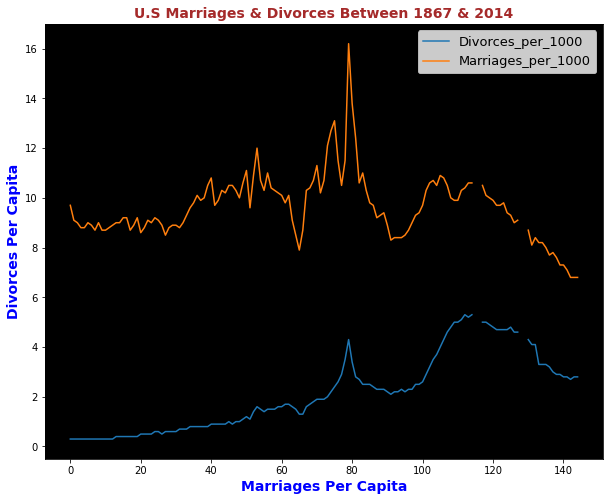

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage.head()

year = marriage['Year'].values
divorces_count = marriage['Divorces_per_1000']
marriages_count = marriage['Marriages_per_1000']

plt.figure(figsize=(10,8))
divorces_count.plot.line()
marriages_count.plot.line()

ax = plt.axes()
ax.set_facecolor("black")

plt.title("U.S Marriages & Divorces Between 1867 & 2014", Color = "Brown", fontsize = 14, fontweight='bold')
plt.xlabel("Marriages Per Capita", Color = "Blue", fontsize = 14 , fontweight='bold')
plt.ylabel("Divorces Per Capita", Color = "Blue",fontsize = 14, fontweight='bold')
plt.legend(fontsize = 13)

plt.show()


# Question 7

<ipython-input-8-88c86ea67532>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("U.S Marriages & Divorces For Years 1900,1950 & 2000", Color = "Brown", fontsize = 14, fontweight='bold')
<ipython-input-8-88c86ea67532>:19: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Year", Color = "Blue", fontsize = 14 , fontweight='bold')
<ipython-input-8-88c86ea67532>:20: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("Counts of Marriages/Divorces ", Color = "Blue",fontsize = 14, fontweight='bold')


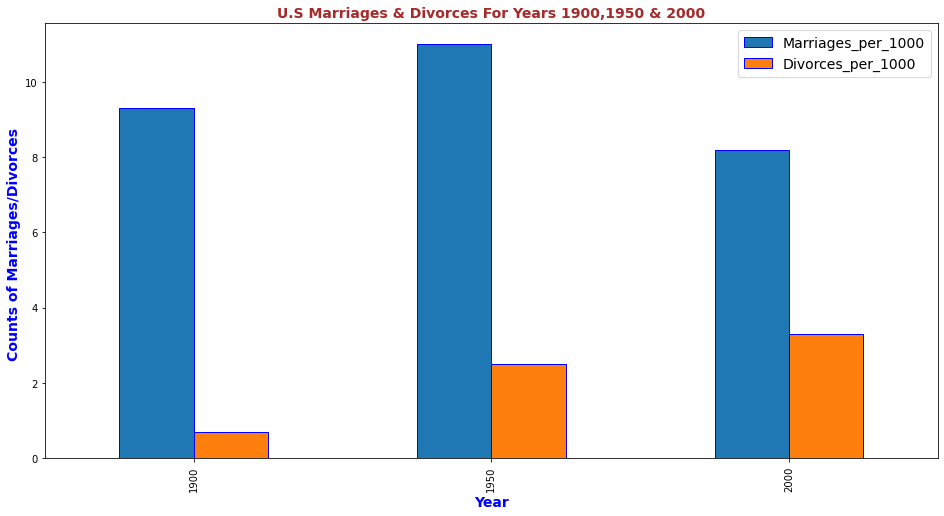

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

marriage = pd.read_csv('us-marriages-divorces-1867-2014.csv')
marriage.head()


newdf = marriage [["Year","Marriages_per_1000","Divorces_per_1000"]]
newdf
year = newdf[newdf["Year"].isin([1900, 1950,2000])]
year
final = year.set_index('Year')
final
final.plot.bar(figsize=(16,8),edgecolor='blue')

plt.title("U.S Marriages & Divorces For Years 1900,1950 & 2000", Color = "Brown", fontsize = 14, fontweight='bold')
plt.xlabel("Year", Color = "Blue", fontsize = 14 , fontweight='bold')
plt.ylabel("Counts of Marriages/Divorces ", Color = "Blue",fontsize = 14, fontweight='bold')
plt.legend(fontsize = 14)

plt.show()

# Question 8

<ipython-input-9-ff9130e5f177>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel('Kill Counts', Color = "Blue", fontsize = 14)
<ipython-input-9-ff9130e5f177>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel('Actor', Color = "Blue", fontsize = 14)
<ipython-input-9-ff9130e5f177>:18: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Deadliest Actor in Hollywood", Color = "Brown", fontsize=18)
No handles with labels found to put in legend.


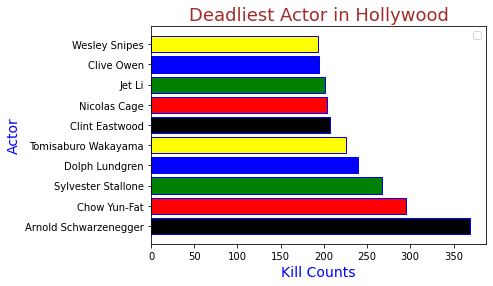

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

actor_df = pd.read_csv('actor_kill_counts.csv')
actor_df.head()

actor_df = actor_df.sort_values('Count',ascending = False)
actor_df.head(10)

actor = actor_df['Actor']
count = actor_df['Count']

plt.barh(actor,count,color=['black', 'red', 'green', 'blue', 'yellow'],edgecolor='blue')

plt.xlabel('Kill Counts', Color = "Blue", fontsize = 14)
plt.ylabel('Actor', Color = "Blue", fontsize = 14) 
plt.title("Deadliest Actor in Hollywood", Color = "Brown", fontsize=18)
plt.legend() 
plt.show()

# Question 9

<ipython-input-10-2823f55aff82>:17: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Causes of Death of Roman Emperors',Color = "Brown", fontsize = 20, fontweight='bold')


(-1.1074905606502174,
 1.100356703288005,
 -1.1239462980575081,
 1.1082623046899291)

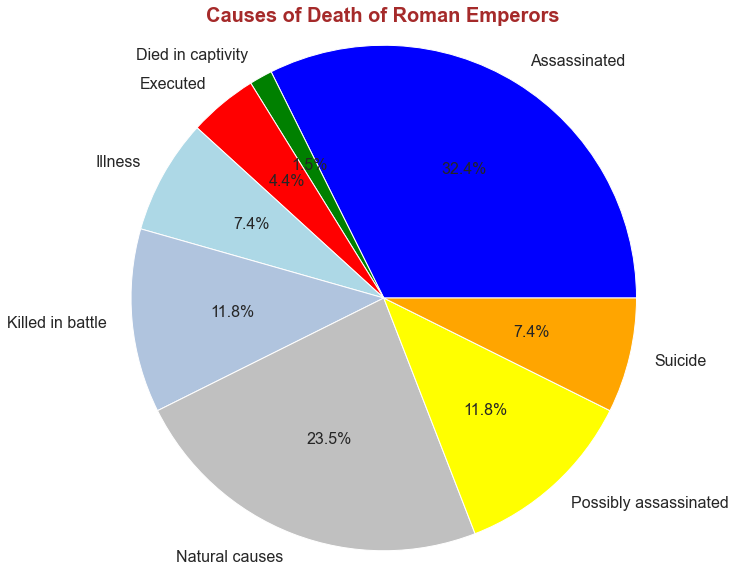

In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set()

roman_emperors = pd.read_csv('roman-emperor-reigns.csv')
roman_emperors.head()

assassinated_emperors_new = roman_emperors[['Emperor','Cause_of_Death']]

assassinated_emperors_group = assassinated_emperors_new.groupby("Cause_of_Death")['Emperor'].count()

my_colors = ['blue','green','red','lightblue','lightsteelblue','silver','yellow','orange']
assassinated_emperors_group.plot.pie(autopct="%.1f%%", figsize = (10,10) , fontsize = 16, ylabel = '',colors=my_colors)
plt.title('Causes of Death of Roman Emperors',Color = "Brown", fontsize = 20, fontweight='bold')
plt.axis('equal')

# Question 10

<ipython-input-11-d5835a55195a>:14: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title("Arcade Revenue vs CS Doctorate", Color = "Brown", fontsize = 18, fontweight='bold')
<ipython-input-11-d5835a55195a>:15: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.xlabel("Total Arcade Revenue (billions)", Color = "Blue", fontsize = 14 , fontweight='bold')
<ipython-input-11-d5835a55195a>:16: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.ylabel("CS Doctorates Awarded (US)", Color = "Blue",fontsize = 14, fontweight='bold')


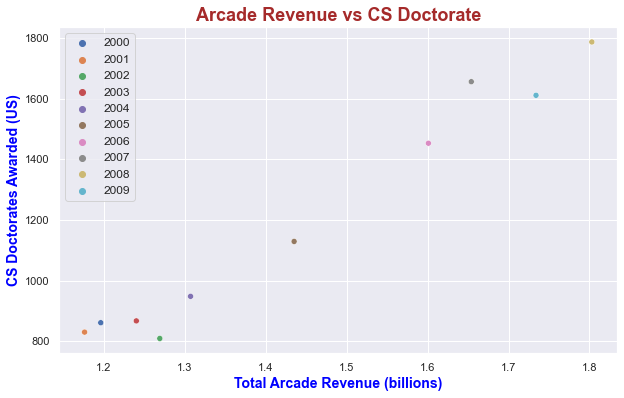

In [11]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

arcade_revnue = pd.read_csv('arcade-revenue-vs-cs-doctorates.csv')
arcade_revnue.head()

plt.figure(figsize=(10,6))
sns.scatterplot(
    x='Total Arcade Revenue (billions)', y='Computer Science Doctorates Awarded (US)', hue='Year'
    , data=arcade_revnue, palette="deep")

plt.title("Arcade Revenue vs CS Doctorate", Color = "Brown", fontsize = 18, fontweight='bold')
plt.xlabel("Total Arcade Revenue (billions)", Color = "Blue", fontsize = 14 , fontweight='bold')
plt.ylabel("CS Doctorates Awarded (US)", Color = "Blue",fontsize = 14, fontweight='bold')
plt.legend(fontsize = 12)

plt.show()

